In [1]:
import torch
import matplotlib.pyplot as plt
import ESN
import time
import numpy as np
torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)
# Parameters
Two,Ttrain = 2000,100000
N = 100
C = 0.95
dim = 1
maxtau = int(N*2)

N= N*dim

taus = np.arange(1,maxtau)

torch.manual_seed(0)
#torch.manual_seed(111)

u_asym = torch.rand(dim, Two + Ttrain)
#u_sym = u_asym
u_sym = 2 * u_asym - 1

esn = ESN.ESN_mult(N, uC=C, dim=dim)

st = time.time()
Xwo = esn.run_washout(u_sym, Two, actf="identity")
print("runtime :",time.time()-st)

st = time.time()
#mfs = ESN.MCwithPI_general(u_sym, Xwo, maxtau)
#mfs = ESN.MCwithPI_general_newsur(u_sym, Xwo, maxtau,sur_sets=1)
#mfs = ESN.MC_cSVD_old(u_sym, Xwo, maxtau)
#mfs,sur_val = ESN.MC_cSVD(u_sym, Xwo, maxtau,ret_sur=True)

#mfs1,raw_res,sur_val = ESN.MC_cSVD(u_sym, Xwo, maxtau,raw_mfs=True,rev_method=False)
raw_res, lin, rev,sur_val =ESN.MC_cSVD(u_sym, Xwo, maxtau,ret_all=True)
mfs3 = (raw_res - sur_val.unsqueeze(1))/(1-sur_val.unsqueeze(1))

mfs1 = lin
mfs2 = rev
print("calc time :",time.time()-st)


#st = time.time()
#mfs = ESN.MCwithPI_general(u_sym, Xwo, maxtau)
#mfs = ESN.MCwithPI_general_with_surrogate(u_sym, Xwo, maxtau,sur_samples=10)
#mfs = ESN.MCwithPI_general_newsur(u_sym, Xwo, maxtau,sur_sets=1)
#mfs = ESN.MC_cSVD_old(u_sym, Xwo, maxtau)
#mfs2 = ESN.MC_cSVD(u_sym, Xwo, maxtau)
#print("calc time :",time.time()-st)
#mfs3 = ESN.MC_cSVD(u_sym, Xwo, maxtau)
totMC = torch.sum(raw_res).cpu().numpy()
totMC1 = torch.sum(mfs1).cpu().numpy()
totMC2 = torch.sum(mfs2).cpu().numpy()
#totMC3 = torch.sum(mfs3).cpu().numpy()

#colors = ["r", "g", "b", "c", "m", "y","pink","lime"]
print(f"totMC raw:{totMC}\ntotMC lin:{totMC1}\ntotMC rev:{totMC2}\nsurrogate value: {sur_val.cpu().numpy()}")
#print(totMC3)
#print(f"totMC:{totMC}")

runtime : 4.891381502151489
calc time : 0.12655973434448242
totMC raw:100.29086543839026
totMC lin:99.98921490375261
totMC rev:99.98890997492234
surrogate value: [0.00100985]


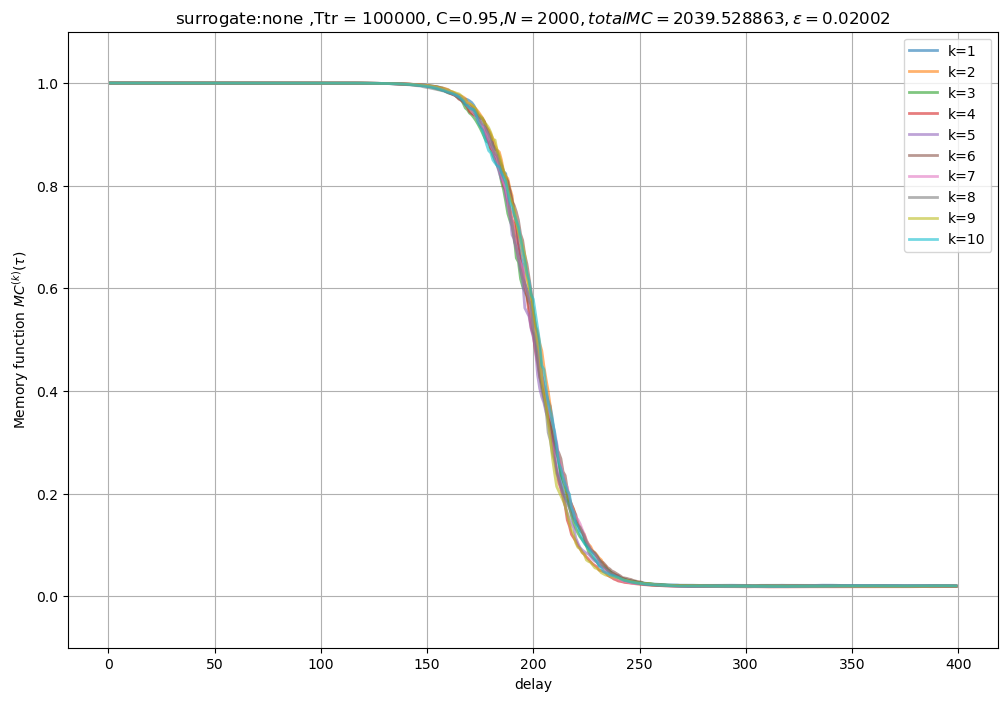

In [6]:
### Raw data plot

fig,ax = plt.subplots(figsize=(12,8))
for d in range(dim):
    #plt.plot(taus,mfs[d].cpu().numpy(),color=colors[d],alpha=0.6,label="dim "+str(d))
    plt.plot(taus,raw_res[d].cpu().numpy(),alpha=0.6,label="k="+str(d+1),linewidth=2)
ave_sur = torch.mean(sur_val).cpu().numpy()
totrawMC = torch.sum(raw_res).cpu().numpy()
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'surrogate:%s ,Ttr = %d, C=%.2f,$N=%d, totalMC=%3f, \epsilon=%.5f$'%("none",Ttrain,C,N,totrawMC,ave_sur))
plt.legend()
plt.grid(True)
plt.savefig(f"./experiments/surrogate/raw_{dim}d_{Ttrain}T_{N}N.png")

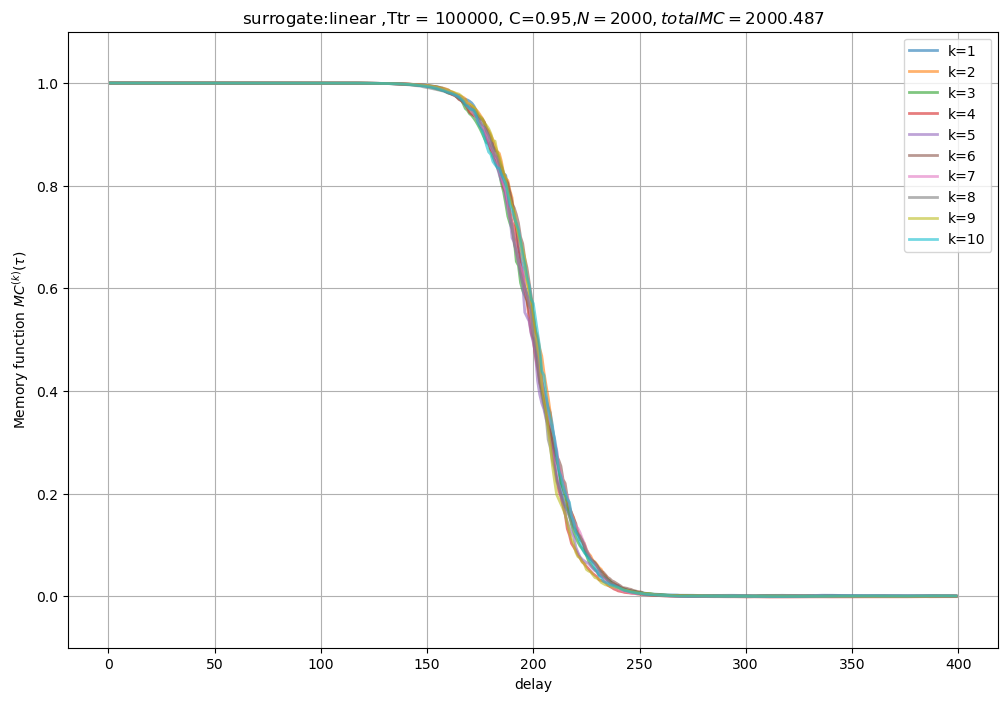

In [7]:
### lin method data plot

fig,ax = plt.subplots(figsize=(12,8))
for d in range(dim):
    #plt.plot(taus,mfs[d].cpu().numpy(),color=colors[d],alpha=0.6,label="dim "+str(d))
    plt.plot(taus,mfs1[d].cpu().numpy(),alpha=0.6,label="k="+str(d+1),linewidth=2)

totMC = torch.sum(mfs1).cpu().numpy()
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'surrogate:%s ,Ttr = %d, C=%.2f,$N=%d, totalMC=%.3f$'%("linear",Ttrain,C,N,totMC))
plt.legend()
plt.grid(True)
plt.savefig(f"./experiments/surrogate/lin_{dim}d_{Ttrain}T_{N}N.png")

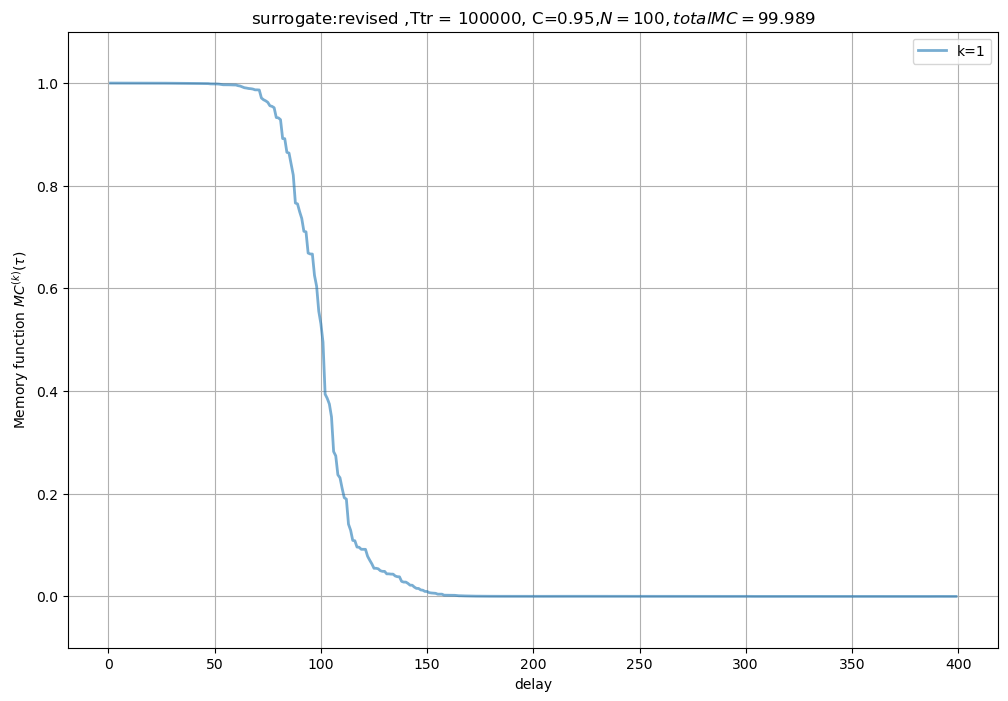

In [2]:
### rev method data plot

fig,ax = plt.subplots(figsize=(12,8))
for d in range(dim):
    #plt.plot(taus,mfs[d].cpu().numpy(),color=colors[d],alpha=0.6,label="dim "+str(d))
    plt.plot(taus,mfs2[d].cpu().numpy(),alpha=0.6,label="k="+str(d+1),linewidth=2)

totMC = torch.sum(mfs2).cpu().numpy()
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'surrogate:%s ,Ttr = %d, C=%.2f,$N=%d, totalMC=%.3f$'%("revised",Ttrain,C,N,totMC))
plt.legend()
plt.grid(True)
plt.savefig(f"./experiments/surrogate/rev_{dim}d_{Ttrain}T_{N}N.png")

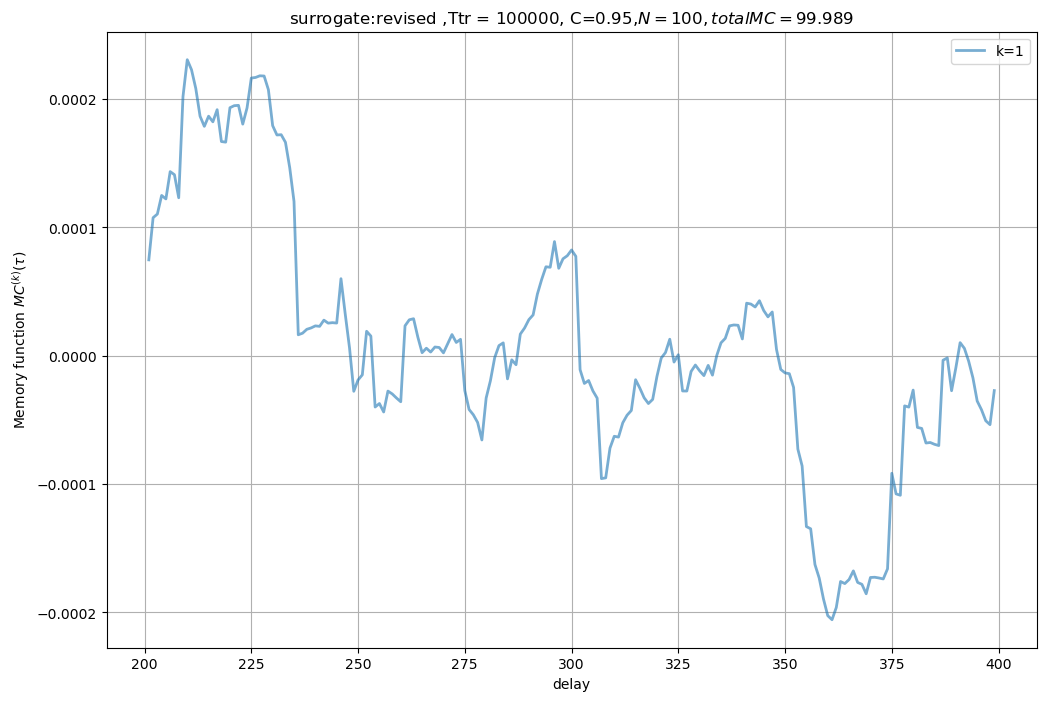

In [5]:
### rev method data plot
st = 200


fig,ax = plt.subplots(figsize=(12,8))
for d in range(dim):
    #plt.plot(taus,mfs[d].cpu().numpy(),color=colors[d],alpha=0.6,label="dim "+str(d))
    plt.plot(taus[st:],mfs2[d][st:].cpu().numpy(),alpha=0.6,label="k="+str(d+1),linewidth=2)

totMC = torch.sum(mfs2).cpu().numpy()
#plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'surrogate:%s ,Ttr = %d, C=%.2f,$N=%d, totalMC=%.3f$'%("revised",Ttrain,C,N,totMC))
plt.legend()
plt.grid(True)
plt.savefig(f"./experiments/surrogate/rev_{dim}d_{Ttrain}T_{N}N.png")

In [4]:
print(float(torch.mean(mfs2[0][200:])))

7.466619901811436e-06
